# Ford Go Bike System Data Analysis & visualization

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Loading Data

In [3]:
df = pd.read_csv("201902-fordgobike-tripdata.csv")

## Assesing Data

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
80612,743,2019-02-18 15:09:17.7510,2019-02-18 15:21:41.2220,10.0,Washington St at Kearny St,37.795393,-122.404770,368.0,Myrtle St at Polk St,37.785434,-122.419622,5480,Subscriber,1998.0,Male,No
24977,683,2019-02-25 17:32:20.0270,2019-02-25 17:43:43.1240,24.0,Spear St at Folsom St,37.789677,-122.390428,92.0,Mission Bay Kids Park,37.772301,-122.393028,5228,Subscriber,1981.0,Male,No
143040,472,2019-02-07 16:20:23.3090,2019-02-07 16:28:15.3640,22.0,Howard St at Beale St,37.789756,-122.394643,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5149,Subscriber,1973.0,Male,No
133973,759,2019-02-08 17:59:30.2330,2019-02-08 18:12:09.4100,81.0,Berry St at 4th St,37.775880,-122.393170,114.0,Rhode Island St at 17th St,37.764478,-122.402570,1777,Subscriber,1966.0,Female,No
4725,414,2019-02-28 15:09:19.6780,2019-02-28 15:16:14.3920,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,267.0,Derby St at College Ave,37.861804,-122.253569,4543,Subscriber,1997.0,Male,No
143296,335,2019-02-07 15:53:18.3410,2019-02-07 15:58:53.8700,243.0,Bancroft Way at College Ave,37.869360,-122.254337,266.0,Parker St at Fulton St,37.862464,-122.264791,1611,Subscriber,1989.0,Female,No
119247,241,2019-02-11 18:04:59.1480,2019-02-11 18:09:00.8360,141.0,Valencia St at Cesar Chavez St,37.747998,-122.420219,133.0,Valencia St at 22nd St,37.755213,-122.420975,2061,Subscriber,NaN,NaN,No
57481,601,2019-02-21 08:13:33.1620,2019-02-21 08:23:34.7650,59.0,S Van Ness Ave at Market St,37.774814,-122.418954,36.0,Folsom St at 3rd St,37.783830,-122.398870,5029,Subscriber,NaN,NaN,No
106023,668,2019-02-13 19:14:24.4370,2019-02-13 19:25:32.4950,129.0,Harrison St at 20th St,37.758862,-122.412544,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,4671,Subscriber,NaN,NaN,No
84337,1056,2019-02-17 17:51:39.5430,2019-02-17 18:09:16.0240,97.0,14th St at Mission St,37.768265,-122.420110,119.0,18th St at Noe St,37.761047,-122.432642,6220,Customer,1991.0,Male,No


In [6]:
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

#### notes 
> * there are some unuseful columns :(end_time ,start_station_latitude ,start_station_longitude,end_station_latitude,end_station_longitude)
* some columns has null values : (start_station_id ,start_station_name, end_station_id ,end_station_name,member_birth_year, member_gender) 
* member_birth_year is float but it should be int
* start_station_id ,end_station_id is float but it better be int
* start_time is object but it should be datetime


In [10]:
sum(df.duplicated())

0

In [11]:
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [12]:
df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [13]:
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [14]:
df.member_birth_year.value_counts()

1988.0    10236
1993.0     9325
1989.0     8972
1990.0     8658
1991.0     8498
1992.0     8250
1987.0     8018
1986.0     7973
1994.0     7660
1995.0     7423
1985.0     7028
1984.0     6562
1983.0     5954
1980.0     5024
1982.0     4990
1996.0     4640
1981.0     4345
1979.0     3756
1997.0     3481
1998.0     3208
1978.0     2830
1977.0     2725
1974.0     2633
1999.0     2528
1975.0     2503
1976.0     2442
1973.0     2080
1968.0     1928
1971.0     1924
1972.0     1909
          ...  
1954.0      301
1952.0      189
1951.0      180
1950.0      178
1953.0      158
1947.0      135
1955.0      134
1945.0      105
1949.0       99
1931.0       89
1900.0       53
1948.0       51
2001.0       34
1943.0       30
1942.0       21
1933.0       20
1946.0       19
1902.0       11
1939.0       11
1941.0        9
1901.0        6
1938.0        3
1920.0        3
1934.0        2
1944.0        2
1930.0        1
1910.0        1
1927.0        1
1928.0        1
1878.0        1
Name: member_birth_year,

In [15]:
df.query("member_birth_year < 1920").shape

(72, 16)

#### note
about 72 wrong values in birth year !

In [16]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

## Data Cleaning

#### define
delete unuseful columns from data using drop function

#### code

In [17]:
df.drop(columns= ['end_time','start_station_latitude','start_station_longitude',
                  'end_station_latitude','end_station_longitude'],inplace =True )

#### test

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 11 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(3), int64(2), object(6)
memory usage: 15.4+ MB


#### define
drop null values in all columns using dropna function

#### code

In [19]:
df.dropna(how='any',axis=0,inplace=True)

#### test

In [20]:
df.isnull().sum()

duration_sec               0
start_time                 0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### define
change start_time data type to datetime 

#### code

In [21]:
# convert the Start Time column to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# extract day of week from Start Time 
df['ride_day_of_week'] = df['start_time'].dt.weekday_name

#### test

In [22]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
ride_day_of_week                   object
dtype: object

#### define 
calculate ages of members

#### code

In [23]:
#calculate age in 2021
df['member_age']=2021 - df['member_birth_year']

#drop member_birth_year column
df.drop(columns='member_birth_year',inplace = True)

#### test

In [24]:
df.columns

Index(['duration_sec', 'start_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'ride_day_of_week',
       'member_age'],
      dtype='object')

#### define
change member_age to int

change start_station_id ,end_station_id to int 


#### code

In [25]:
df["member_age"] =df["member_age"].astype('int')

df["start_station_id"] =df["start_station_id"].astype('int')

df["end_station_id"] =df["end_station_id"].astype('int')


#### test

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
start_station_id           174952 non-null int32
start_station_name         174952 non-null object
end_station_id             174952 non-null int32
end_station_name           174952 non-null object
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
ride_day_of_week           174952 non-null object
member_age                 174952 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 15.3+ MB


In [27]:
df.member_age.min(),df.member_age.max()

(20, 143)

#### note
It's not logic that a member age is above 100 and ride a bike!

I think it is just a typo when writting the date of birth so i will delete this rows 


#### define
delete wrong ages that above 100 years 

In [28]:
df.query("member_age >100").shape
df = df[df['member_age'] < 100] 

#### test

In [29]:
df.member_age.max()

94

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174877 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               174877 non-null int64
start_time                 174877 non-null datetime64[ns]
start_station_id           174877 non-null int32
start_station_name         174877 non-null object
end_station_id             174877 non-null int32
end_station_name           174877 non-null object
bike_id                    174877 non-null int64
user_type                  174877 non-null object
member_gender              174877 non-null object
bike_share_for_all_trip    174877 non-null object
ride_day_of_week           174877 non-null object
member_age                 174877 non-null int32
dtypes: datetime64[ns](1), int32(3), int64(2), object(6)
memory usage: 15.3+ MB


### What is the structure of your dataset?

> it consists of 183412 observation with 16 columns before cleaning

### What is/are the main feature(s) of interest in your dataset?

> I am looking forward to explain the relation between the duration and gender of members , I also hope to know the most fequent days that members ride bikes

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start time , member gender and duration

## Store Data
In this section I stored cleaned data to use it in analysis and visualization

In [31]:
df.to_csv('Ford_Go_Bike_cleaned_Data.csv', index = False)

## Data Analysis & Visualization

In [34]:
Ford_Bike_Data =pd.read_csv("Ford_Go_Bike_cleaned_Data.csv")
Ford_Bike_Data.head()

,duration_sec,start_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,ride_day_of_week,member_age
0,52185,2019-02-28 17:32:10.145,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,No,Thursday,37
1,61854,2019-02-28 12:13:13.218,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,Thursday,49
2,36490,2019-02-28 17:54:26.010,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,Other,No,Thursday,32
3,1585,2019-02-28 23:54:18.549,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,Male,Yes,Thursday,47
4,1793,2019-02-28 23:49:58.632,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,5200,Subscriber,Male,No,Thursday,62


### Q1) what is the most frequent member gender?

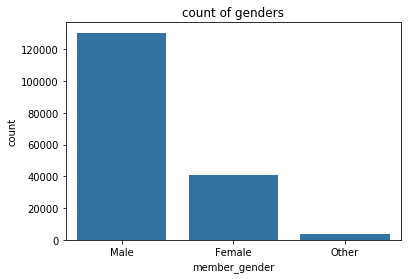

In [35]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[0]

# Count the frequency of each unique value in the member_gender column, and sort it in descending order
freq = Ford_Bike_Data['member_gender'].value_counts()

# Get the indexes of the Series
gen_order = freq.index

#plot a count plot using seaborn
sb.countplot(data= Ford_Bike_Data ,x="member_gender", color=base_color, order = gen_order);

#plot title 
plt.title("count of genders");

**it is obvious that most members are males**

### Q2) what is the most and least day of the week in which members ride bikes?

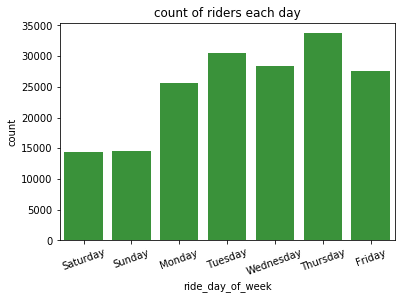

In [36]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[2]

#sort days of the week
gen_order = ['Saturday', 'Sunday','Monday','Tuesday', 'Wednesday' , 'Thursday' ,'Friday']

#plot a count plot using seaborn
sb.countplot(data= Ford_Bike_Data ,x="ride_day_of_week", color=base_color,order = gen_order);

# Use xticks to rotate the category labels 
plt.xticks(rotation=20);

#plot title 
plt.title("count of riders each day");

**From the above chart it's clear that Thursday is the most day of the weak that members ride bikes, Saturday and Sunday are the least two days that members ride bikes the two days seems to be equal !**

### Q3) what is the distribution of user types?

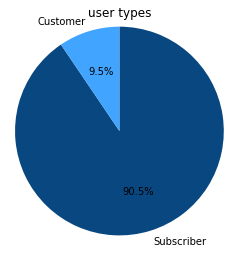

In [37]:
#counting each type
user_types_count = Ford_Bike_Data.user_type.value_counts()

#plotting pie chart with start angle 90 and plot the sorted counts in a clockwise fashion with percentage 
plt.pie(user_types_count, labels =user_types_count.index, startangle = 90, counterclock = False, autopct='%1.1f%%',
        colors = ['#094780', '#41A4FF'],radius = 1.2);

#plot title 
plt.title("user types");

**90.5% of users are subscribers and only 9.5% are customers that's a very big different between the two types !**

### Q4) what are the top 10 popular start stations?

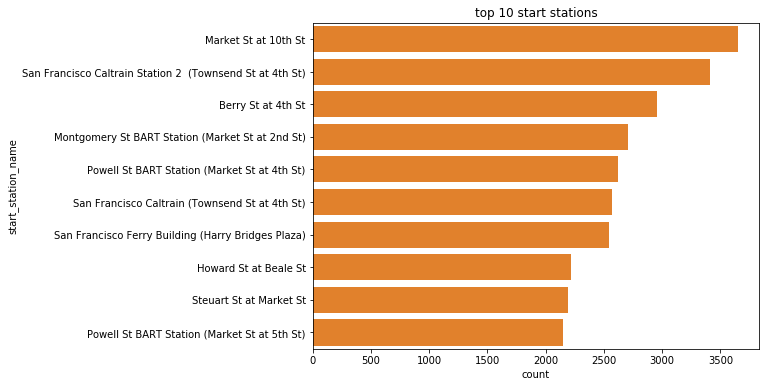

In [38]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[1]

#figure size
plt.figure(figsize=(8,6))

# Count the frequency of each unique value in the start_station_name column, and sort it in descending order
freq = Ford_Bike_Data.start_station_name.value_counts()[0:10]

# Get the indexes of the Series
gen_order = freq.index

#plot a count plot using seaborn
sb.countplot(data= Ford_Bike_Data , y= "start_station_name", color=base_color, order = gen_order);

#plot title 
plt.title("top 10 start stations");

**from the chart above I displayed the top 10 popular start stations and "Market St at 10th st" took the first place**

### Q5) what are the top 10 popular start stations?

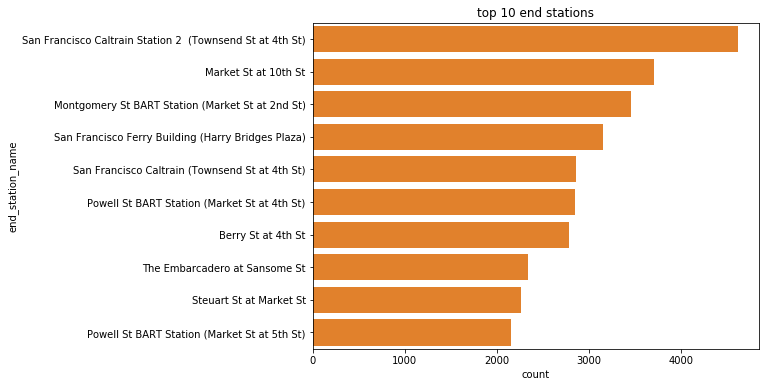

In [39]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[1]

#size of the figure
plt.figure(figsize=(8,6))

# Count the frequency of each unique value in the end_station_name column, and sort it in descending order
freq = Ford_Bike_Data.end_station_name.value_counts()[0:10]

# Get the indexes of the Series
gen_order = freq.index

#plot a count plot using seaborn
sb.countplot(data= Ford_Bike_Data , y= "end_station_name", color=base_color, order = gen_order);

#plot title 
plt.title("top 10 end stations");

**From the chart above I displayed the top 10 popular end stations and "San Francisco Caltrain Station 2  (Townsend St at 4th St)" took the first place**

**From the two charts it seems that most popular start satations is also popular as a end stations and it's logical as this places may be crowded or have alot of bikes riders**

### Q6) what is the member age distribution?

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


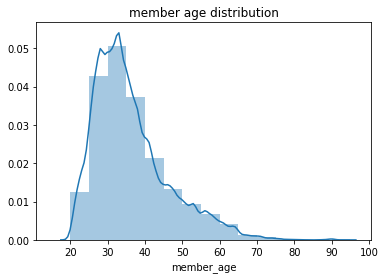

In [40]:
#set bin edges start and end
bin_edges = np.arange(15, Ford_Bike_Data['member_age'].max()+5, 5)

#plot histogram oof ages
sb.distplot(Ford_Bike_Data['member_age'], bins = bin_edges);

#plot title 
plt.title("member age distribution");

**Members ages are between 20 and 94 years old**


**It's clear that the mean of ages is about 36 years old ,also the most frequent age is between 30 and 35 years old**


### Q7) Is the old members have lowest ride duration? \ What is the relation between members ages and duration?

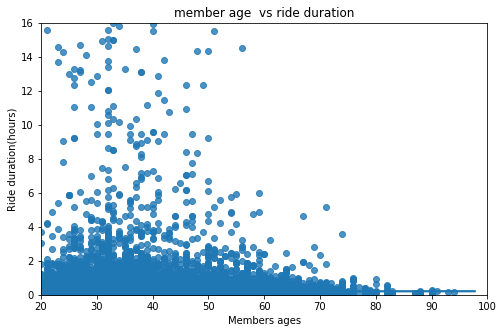

In [41]:
#size of the figure
plt.figure(figsize=(8,5))

#calculating duration in hours
df["ride duration(hours)"] = Ford_Bike_Data ["duration_sec"].div(3600)
df["ages"] = Ford_Bike_Data ["member_age"]

#plotting scatter plot between duration and ages
sb.regplot(data = df ,x = "ages" , y = "ride duration(hours)");

# x,y labels names
plt.xlabel('Members ages')
plt.ylabel('Ride duration(hours)')

#limit x and y scale
plt.xlim(20, 100);
plt.ylim(0, 16);

#plot title 
plt.title("member age  vs ride duration");

**the relation between the members ages and ride duration is strongly negative, people above 70 years have the lowes hours duration (less than 2 hours) in the other hand the longest duration riders are between 20 and 50 years old**

### Q8) which user type has the longest and lowest ride duration?

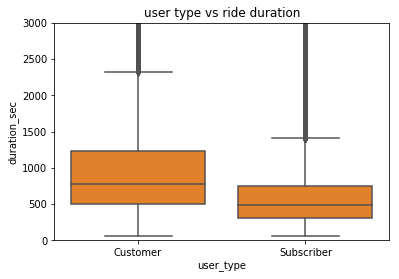

In [42]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[1]

#plotting box plot
sb.boxplot(data= Ford_Bike_Data , x ='user_type', y ='duration_sec', color=base_color)

#setting y limits
plt.ylim(0, 3000);

#plot title 
plt.title("user type vs ride duration");

**customers spent more time using bike than subscribers**

### Q9) which user type has the longest and lowest ride duration?

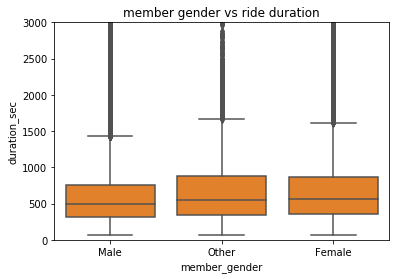

In [43]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[1]

#plotting box plot
sb.boxplot(data= Ford_Bike_Data , x ='member_gender', y ='duration_sec', color=base_color)

#setting y limits
plt.ylim(0, 3000);

#plot title 
plt.title("member gender vs ride duration");

**althogh most of bike riders are males ,on average females have longer ride duration**

### Q10) Are riders who share bikes for all trip have longer trip duration ?

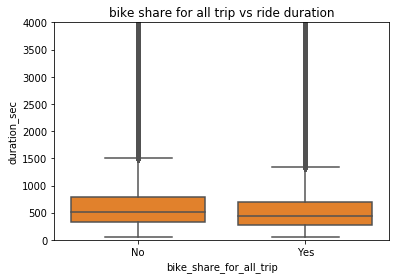

In [44]:
#The color_palette() returns the the current palette as a list of RGB tuples.
base_color = sb.color_palette()[1]

#plotting box plot
sb.boxplot(data= Ford_Bike_Data , x ='bike_share_for_all_trip', y ='duration_sec', color=base_color)

#setting y limits
plt.ylim(0, 4000);

#plot title 
plt.title("bike share for all trip vs ride duration");

**No it is not true members that do not share bike for all trip have longer trip!**

### Q11)  what is the relation between  members genders and days?

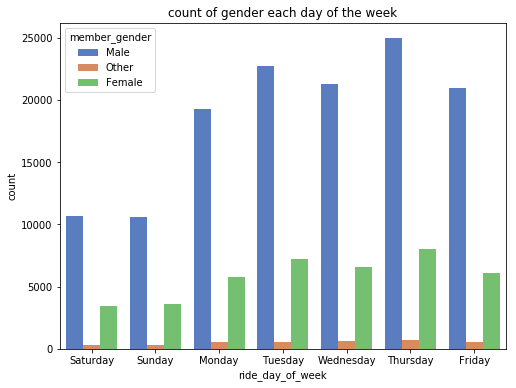

In [45]:
#figure size
plt.figure(figsize=(8,6));

#sort days of the week
gen_order = ['Saturday', 'Sunday','Monday','Tuesday', 'Wednesday' , 'Thursday' ,'Friday']

#plotting count plot
sb.countplot(data = Ford_Bike_Data, x = 'ride_day_of_week', hue = 'member_gender', palette="muted",order= gen_order);

#plot title 
plt.title("count of gender each day of the week");

**It seems that both males and females use bikes mostly in Thursday ,also a fewest number of both use bikes in saturday and sunday**

### Q12)  what is the relation between  members genders and  days?

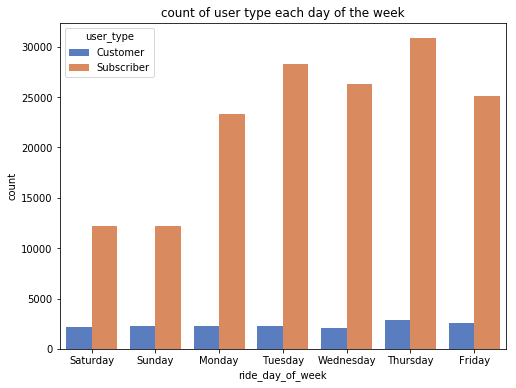

In [46]:
#figure size
plt.figure(figsize=(8,6));

#sort days of the week
gen_order = ['Saturday', 'Sunday','Monday','Tuesday', 'Wednesday' , 'Thursday' ,'Friday']

sb.countplot(data = Ford_Bike_Data, x = 'ride_day_of_week', hue = 'user_type',palette="muted",order=gen_order);

#plot title 
plt.title("count of user type each day of the week");

**Most of customers and subscribers use bikes at Thursday**


**Number of customers that use bikes each day is very close!**

### Q13) What is the relation between ride duration and both age and gender of the members?

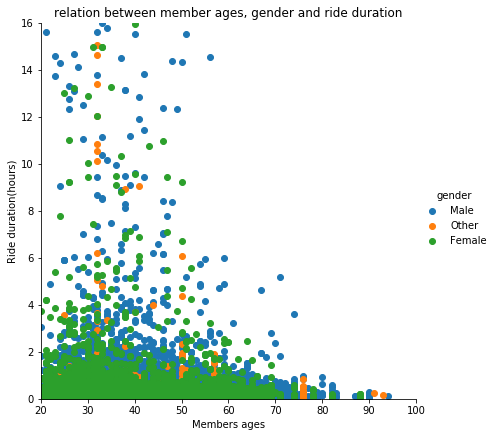

In [47]:
#calculating duration in hours
df["ride duration(hours)"] = Ford_Bike_Data ["duration_sec"].div(3600)
df["ages"] = Ford_Bike_Data ["member_age"]
df["gender"] = Ford_Bike_Data ["member_gender"]

#plotting scatter plot 
g = sb.FacetGrid(data = df, hue = 'gender', height = 6)
g.map(plt.scatter, 'ages', 'ride duration(hours)')
g.add_legend()

# x,y labels names
plt.xlabel('Members ages')
plt.ylabel('Ride duration(hours)')

#limit x and y scale
plt.xlim(20, 100);
plt.ylim(0, 16);

#plot title 
plt.title("relation between member ages, gender and ride duration");

**It's a strongly negative relation between ages and duration**

**Both males and females who are between 20 and 50 years old have long ride duration hours**

**Both males and females  who above 60 years old have short ride duration**

### Q14) what is the relation betwwen the ride duration ,gender,ages and if the bike shared for all trip or not?

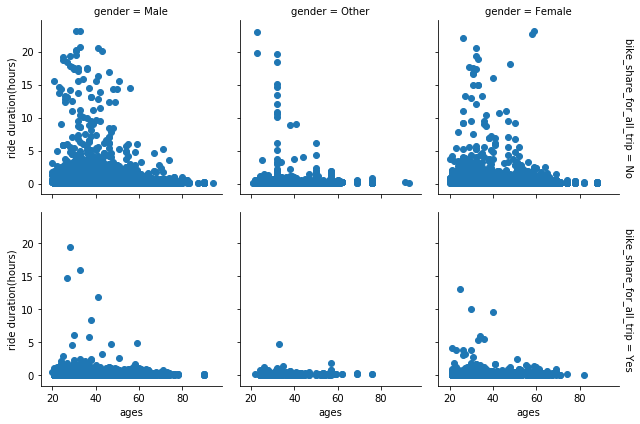

In [48]:
g = sb.FacetGrid(data = df, col = 'gender', row = 'bike_share_for_all_trip', height = 3,
                margin_titles = True)
g.map(plt.scatter, 'ages', 'ride duration(hours)');

**most of males and womans whoes age betwwen 20 and 50 and have a long ride duration did not share the bike for all trip**

**In all genders and ages people who did not share bike for all trip are more than who did**

**males and females who shared bike for all trip are more than other who did**
